<a href="https://colab.research.google.com/github/ttma333/python/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cd/content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


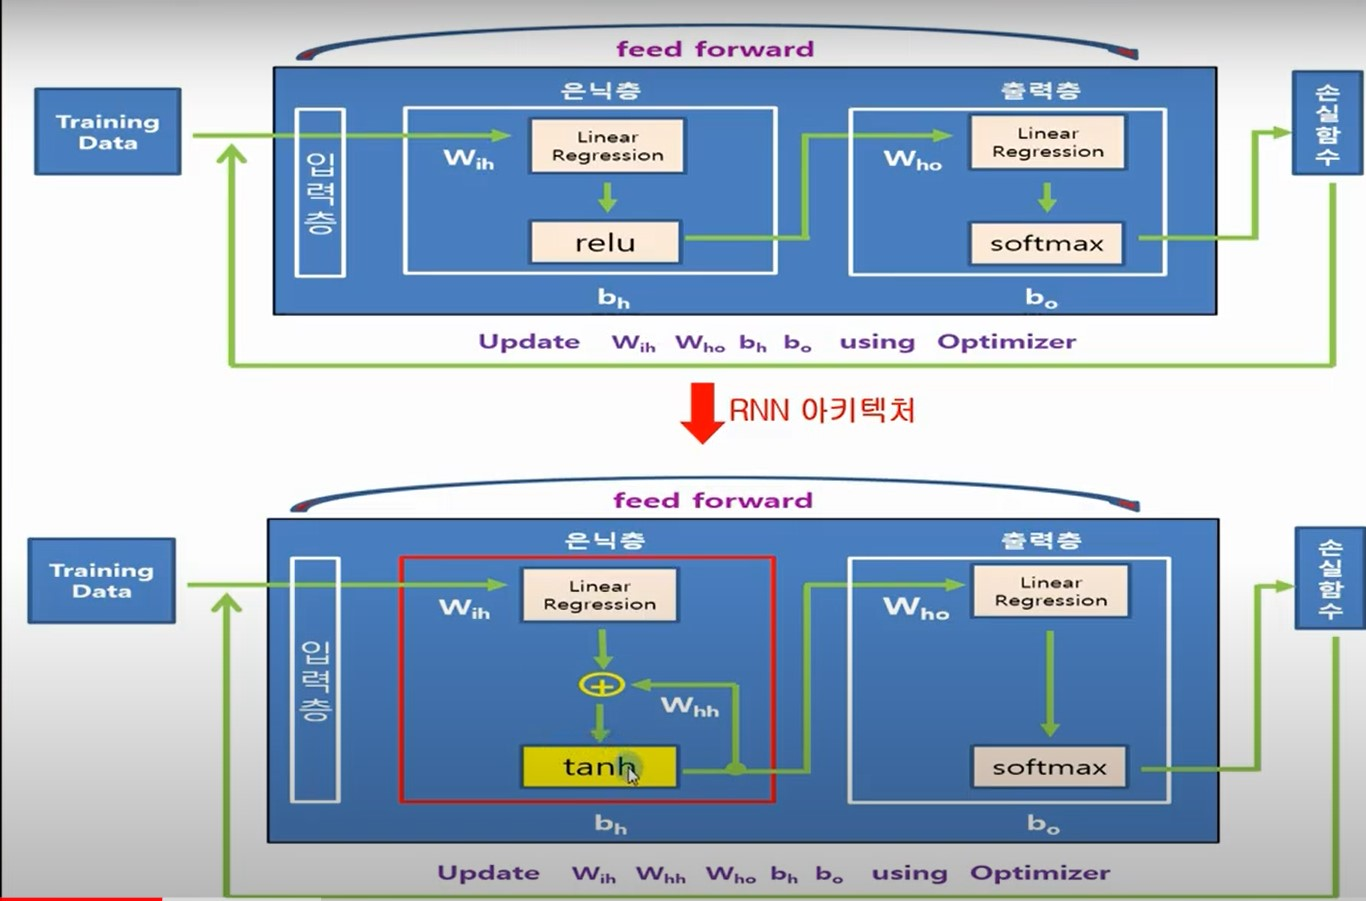

In [ ]:
from IPython.display import Image
Image("rnn1.jpg")

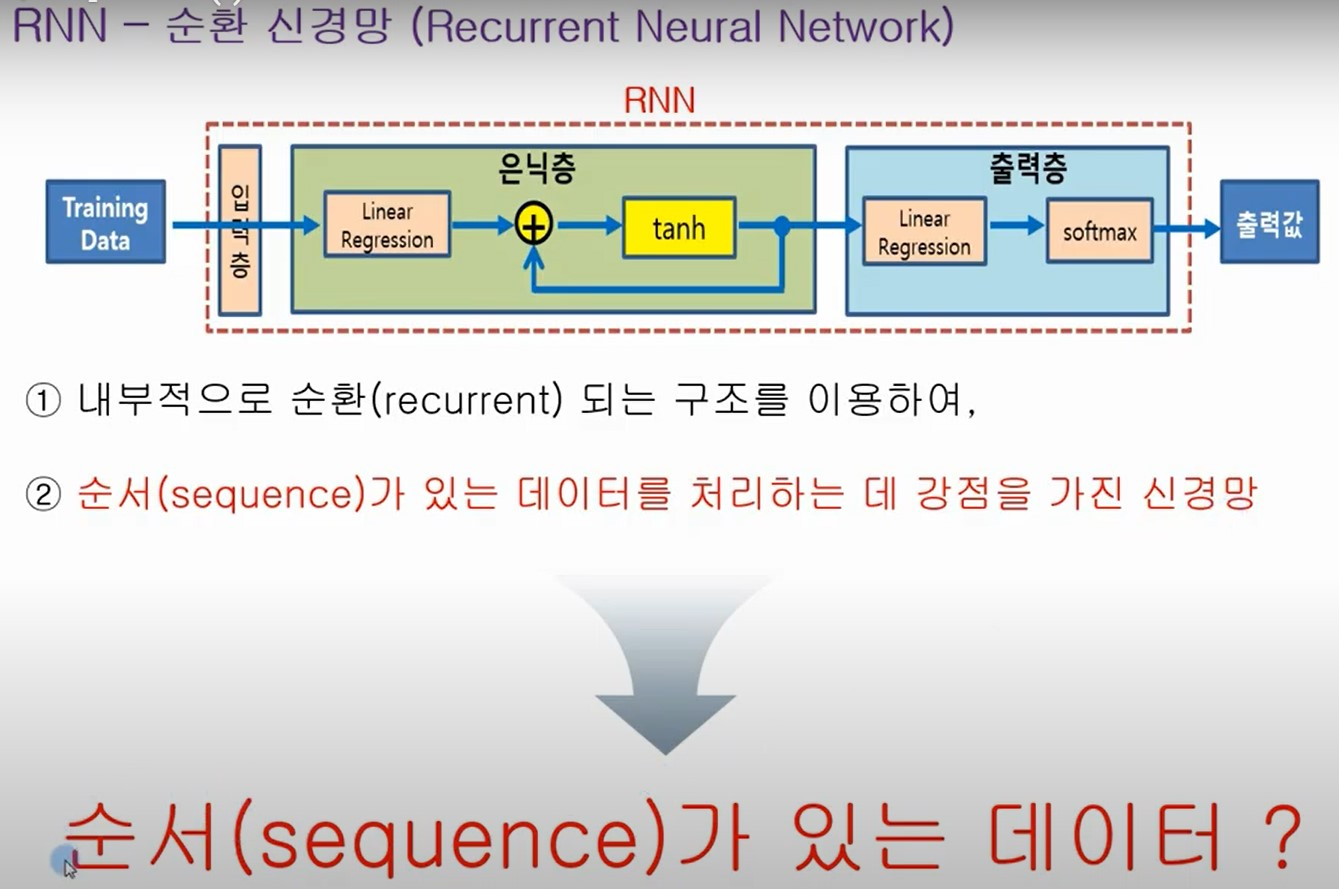

In [ ]:
from IPython.display import Image
Image("rnn2.jpg")

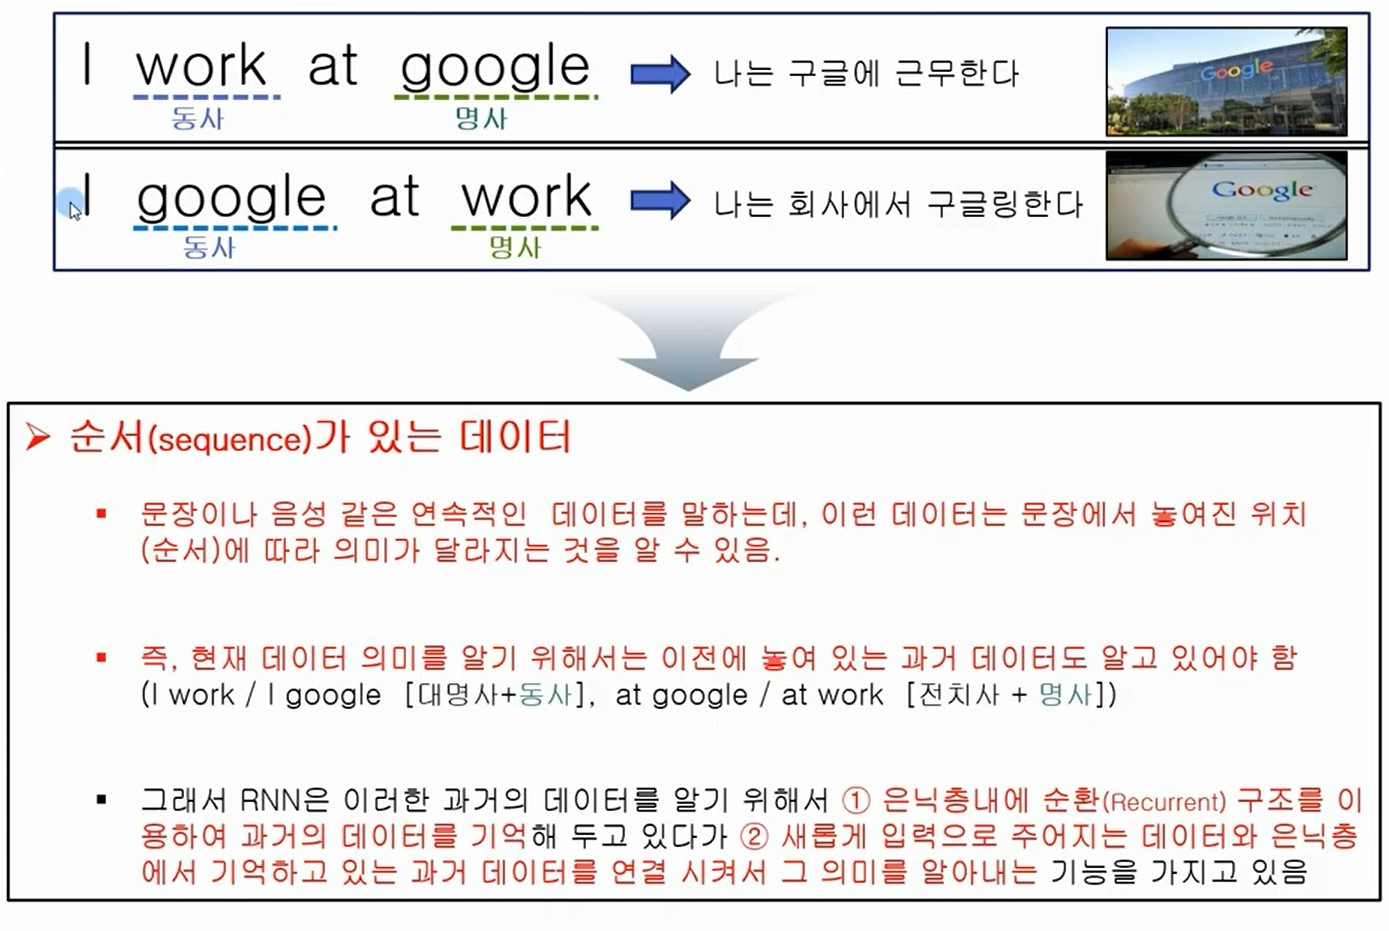

In [ ]:
from IPython.display import Image
Image("rnn3.jpg")

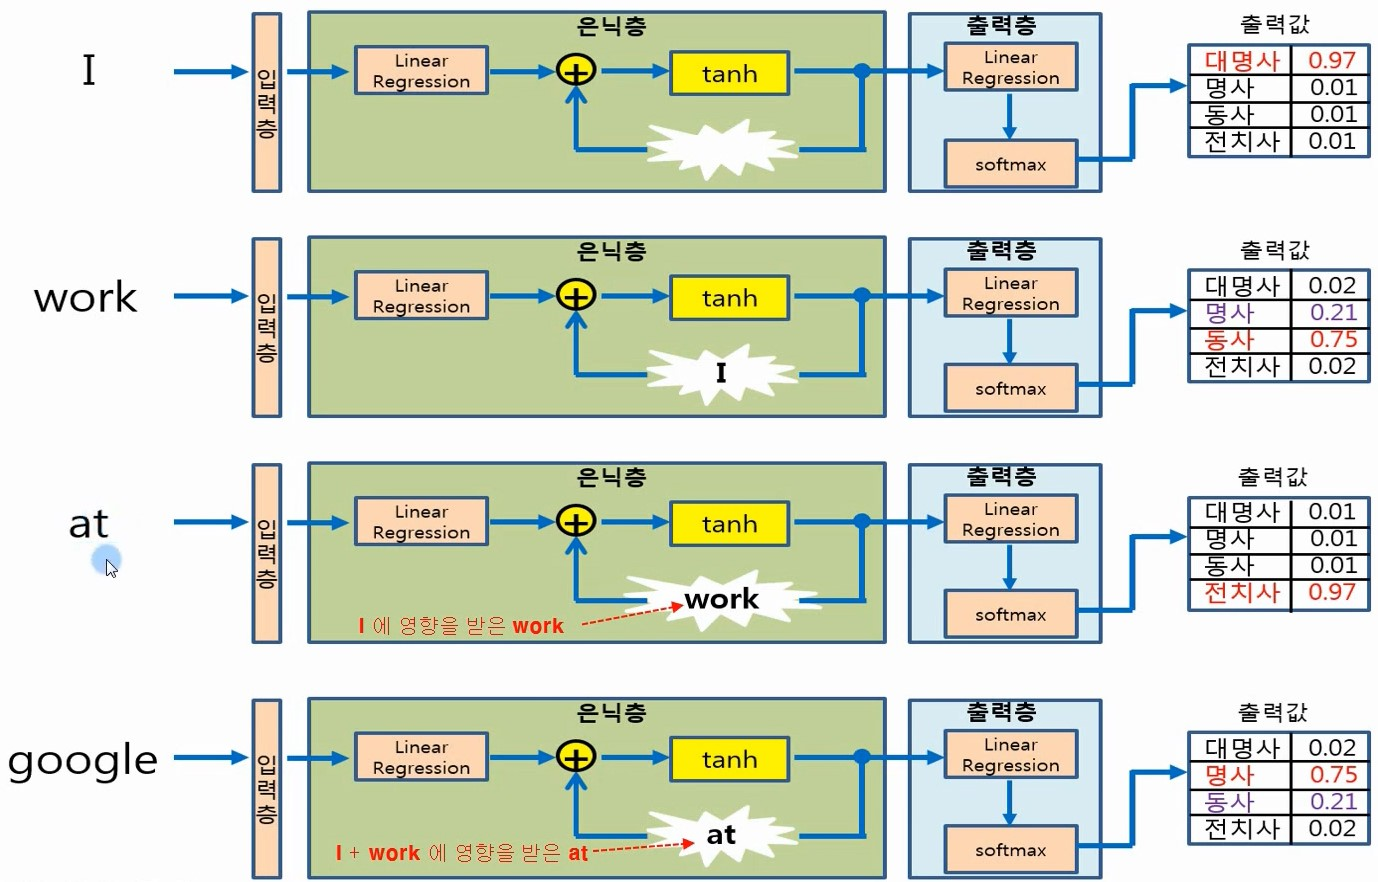

In [ ]:
from IPython.display import Image
Image("rnn4.jpg")

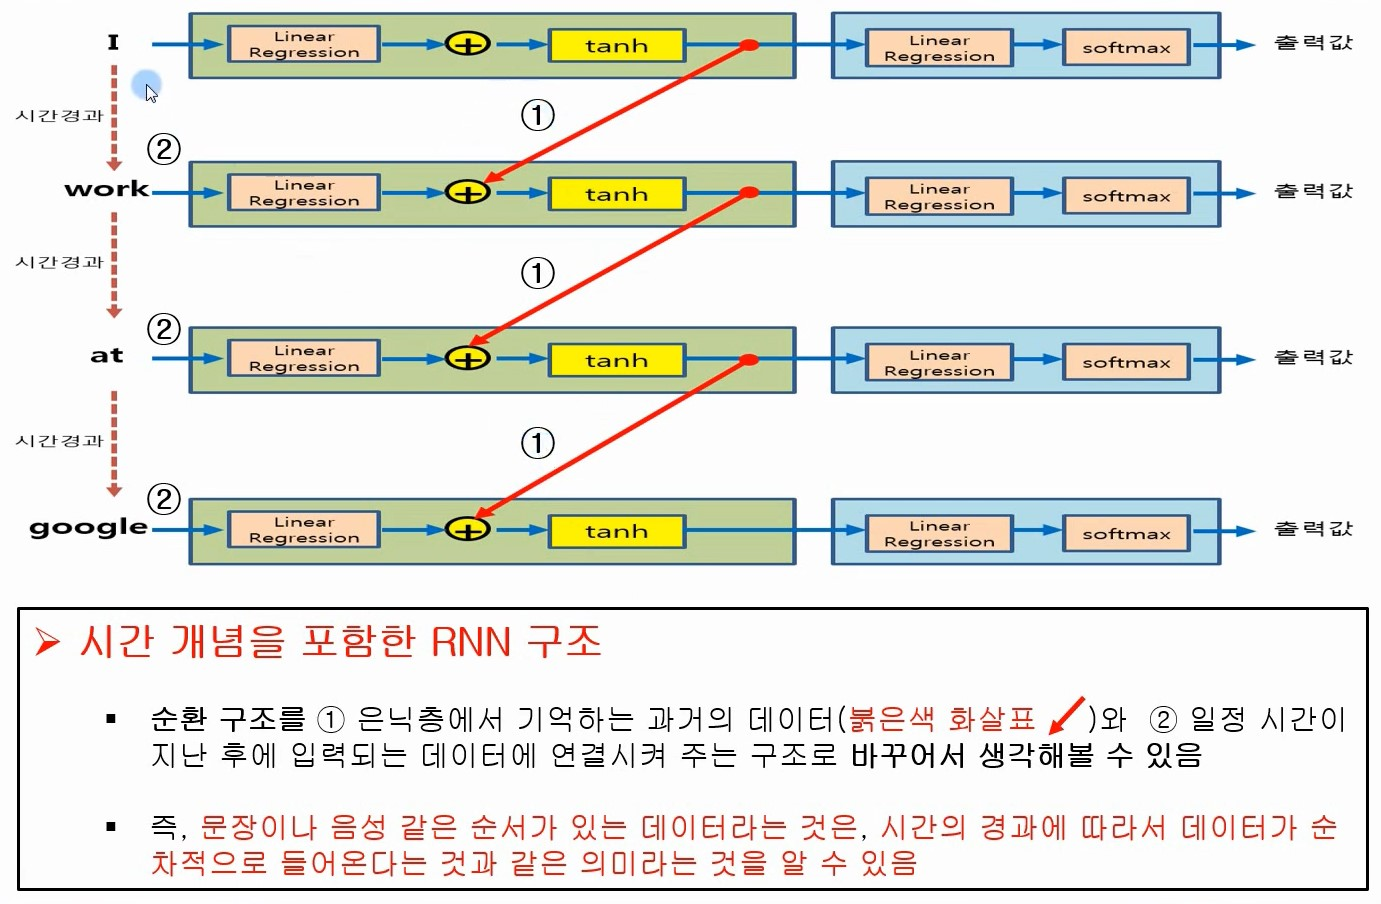

In [ ]:
from IPython.display import Image
Image("rnn5.jpg")

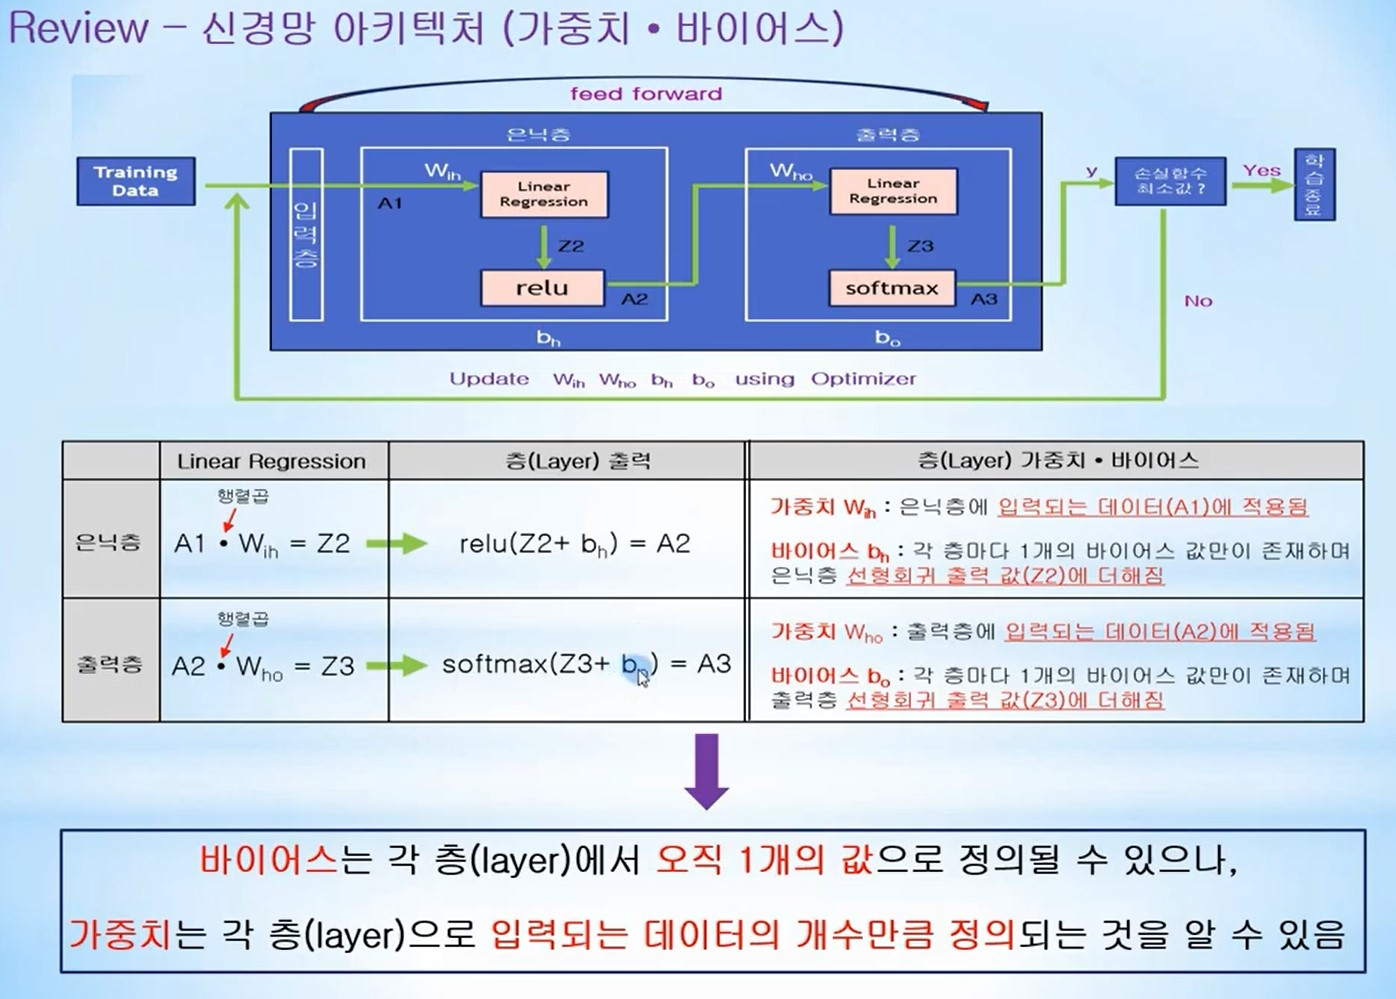

In [ ]:
from IPython.display import Image
Image("rnn6.jpg")

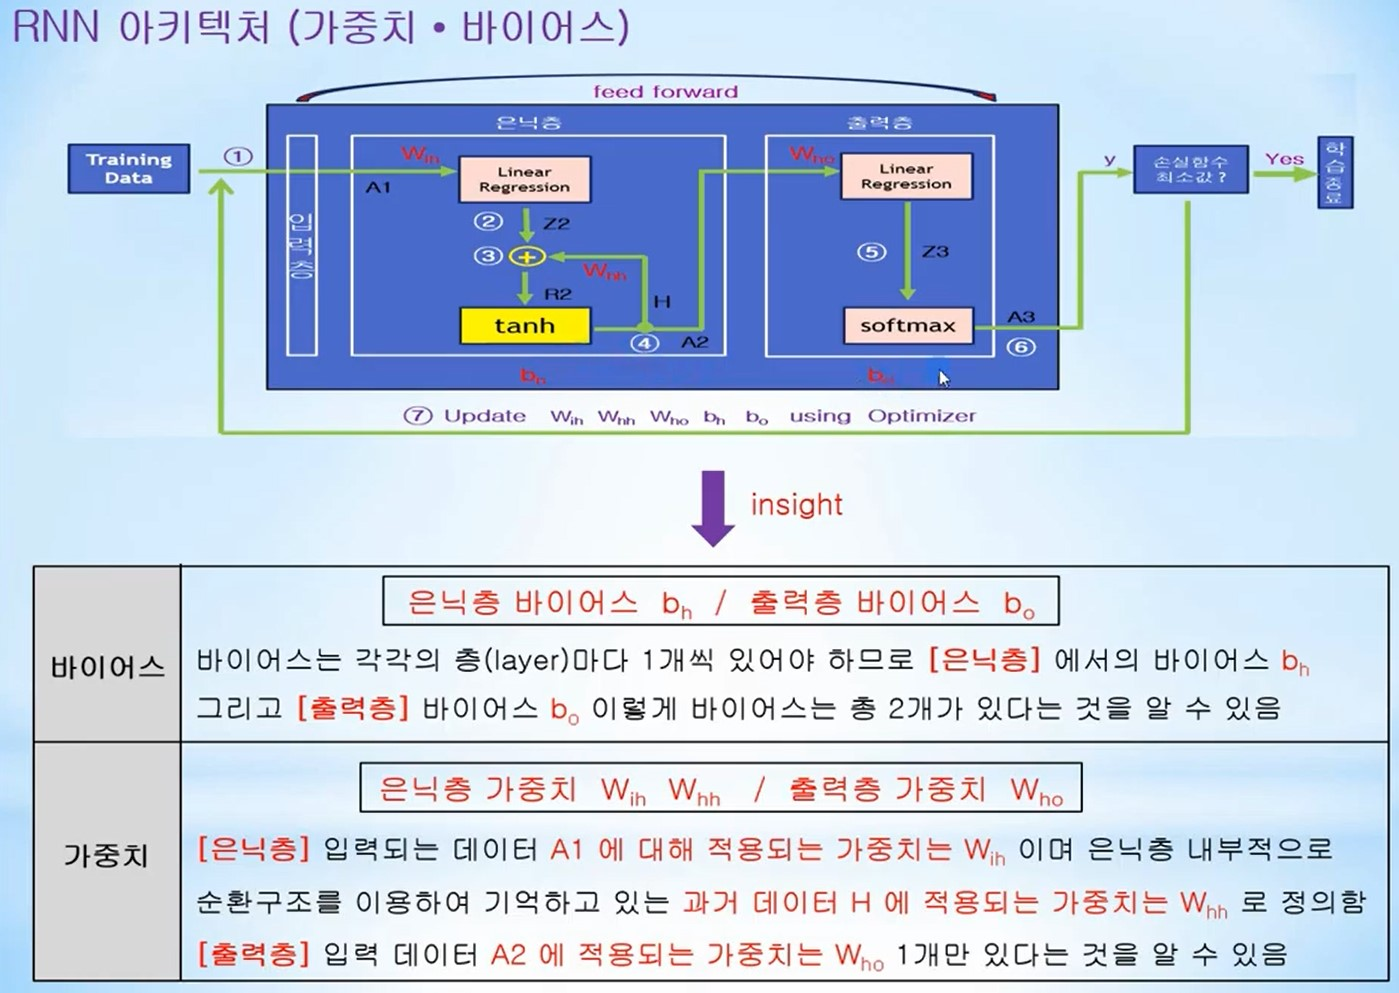

In [ ]:
from IPython.display import Image
Image("rnn7.jpg")

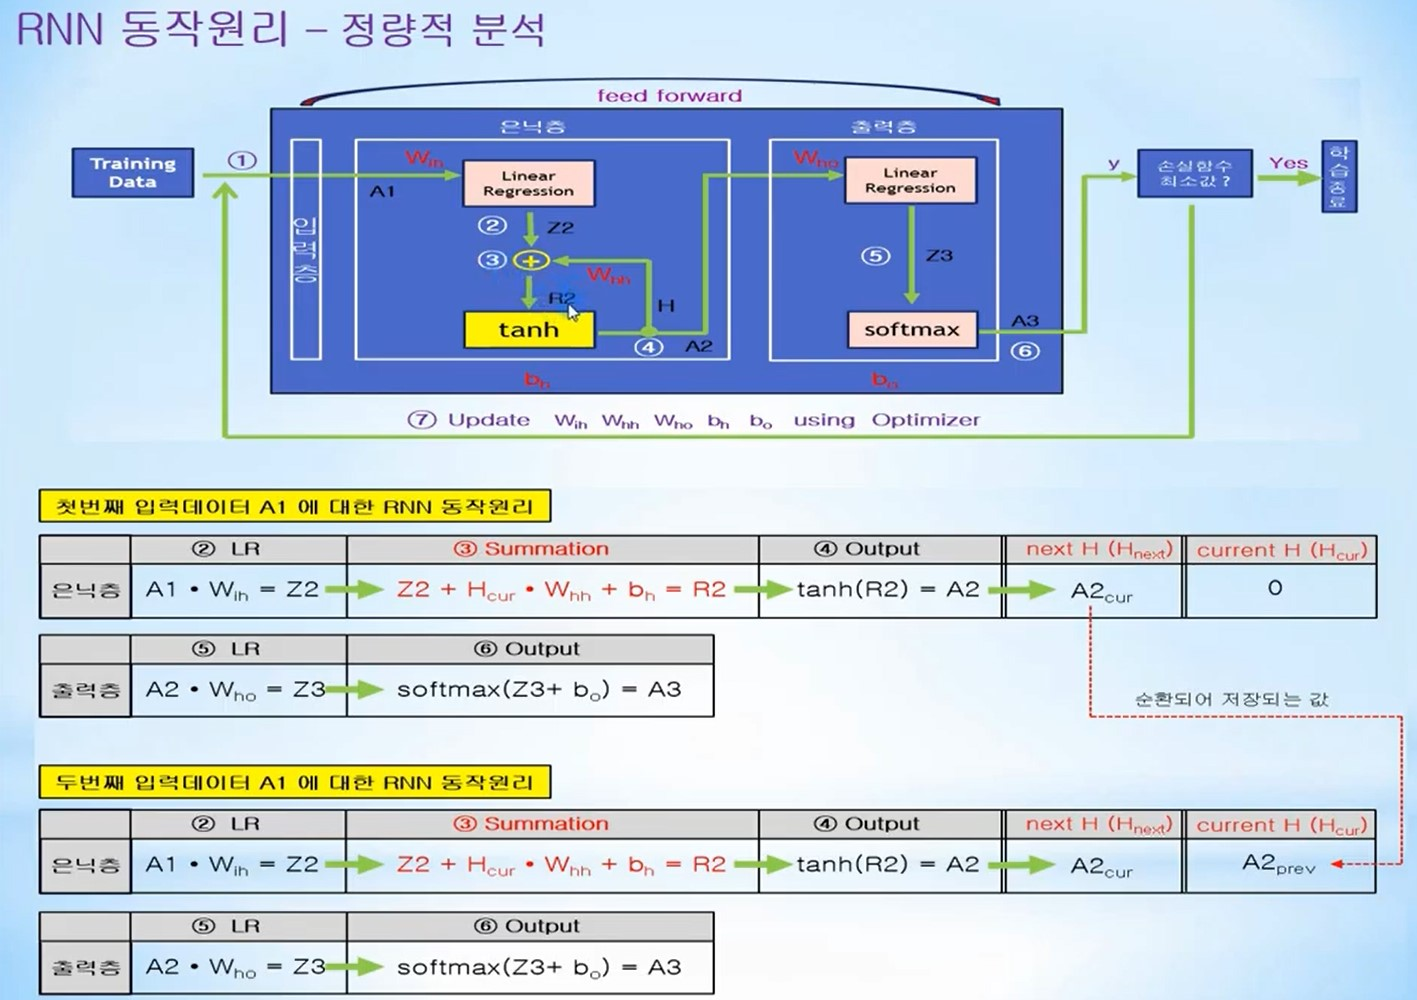

In [ ]:
from IPython.display import Image
Image("rnn8.jpg")

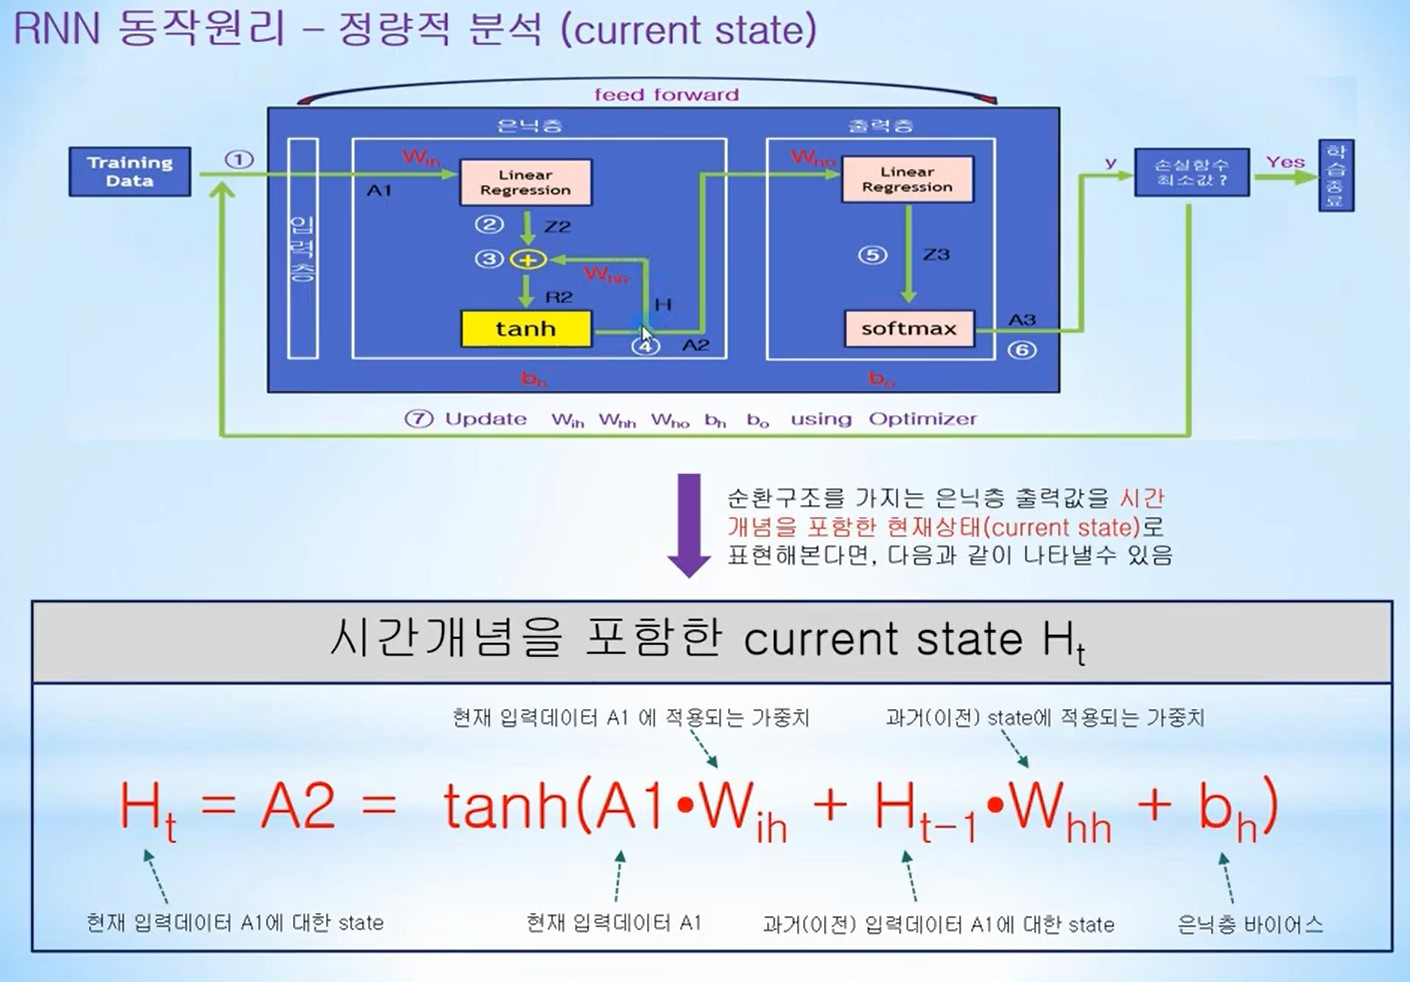

In [ ]:
from IPython.display import Image
Image("rnn9.jpg")

## Feed Forward Network vs Recurrent Network

- Feed Forward Net (앞먹임 구조)
  - 일반적인 구조의 신경망
  - 입력층 → 은닉층 → 출력층으로 이어지는 단방향 구조
  - 이전 스텝의 출력이 영향을 받지 않음

- Recurrent Net (되먹임 구조)
  - 이전 층(Layer), 또는 스텝의 출력이 다시 입력으로 연결되는 신경망 구조
  - 각 스텝마다 이전 상태를 기억 시스템(Memory System)  
  - 현재 상태가 이전 상태에 종속


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN

In [ ]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 전체 상태 시퀀스를 반환
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [5]:
# IMDB 데이터셋

#from keras.utils import pad_sequences
from keras.datasets import imdb
from keras.models import Sequential
from keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
# 시퀀스 패딩

max_features = 10000
maxlen = 100
batch_size = 128
 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), '훈련 시퀀스')
print(len(x_test), '테스트 시퀀스')
 
print('시퀀스 패딩 (samples x time)')
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')
print('x_train 크기:', x_train.shape)
print('x_test 크기:', x_test.shape)

17464789/17464789 [==============================] - 1s 0us/step
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
x_train 크기: (25000, 100)
x_test 크기: (25000, 100)


In [15]:
# embedding 증가 SimpleRNN층을 사용하여 순환 네트워크 훈련
model = Sequential(
    [layers.Embedding(max_features, 100),
     layers.SimpleRNN(32),
     layers.Dense(1, activation='sigmoid')]
)
 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
history=model.fit(x_train,y_train,validation_split=0.2,batch_size=batch_size,epochs=10)

Epoch 1/10
157/157 [==============================] - 13s 78ms/step - loss: 0.6744 - accuracy: 0.5673 - val_loss: 0.5816 - val_accuracy: 0.7306
Epoch 2/10
157/157 [==============================] - 12s 77ms/step - loss: 0.3979 - accuracy: 0.8327 - val_loss: 0.4500 - val_accuracy: 0.8078
Epoch 3/10
157/157 [==============================] - 12s 78ms/step - loss: 0.1777 - accuracy: 0.9383 - val_loss: 0.5566 - val_accuracy: 0.7620
Epoch 4/10
157/157 [==============================] - 12s 76ms/step - loss: 0.0765 - accuracy: 0.9798 - val_loss: 0.5654 - val_accuracy: 0.7968
Epoch 5/10
157/157 [==============================] - 12s 76ms/step - loss: 0.0343 - accuracy: 0.9934 - val_loss: 0.6499 - val_accuracy: 0.7780
Epoch 6/10
157/157 [==============================] - 12s 77ms/step - loss: 0.0243 - accuracy: 0.9951 - val_loss: 0.6602 - val_accuracy: 0.7898
Epoch 7/10
157/157 [==============================] - 12s 77ms/step - loss: 0.0191 - accuracy: 0.9961 - val_loss: 0.7369 - val_accuracy:

In [9]:
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         1000000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                4256      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 1,004,289
Trainable params: 1,004,289
Non-trainable params: 0
_________________________________________________________________


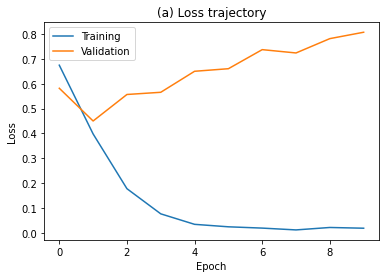

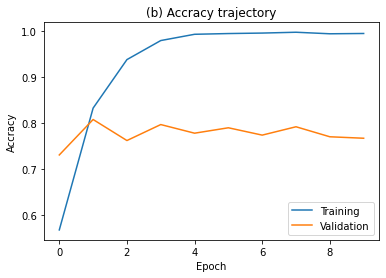

In [16]:
#훈련 검증의 손실과 정확도 시각화
from keraspp import skeras

skeras.plot_loss_acc(history)

In [1]:
cd/content/drive/MyDrive/module

/content/drive/MyDrive/module


In [4]:
from keraspp import skeras